# Modelo de Intercambio Aleatorio de Activos (RAE)

## Sistema económico cerrado con conservación de dinero

El modelo utilizado es el de [Dragulescu & Yakovenko (2000)](https://doi.org/10.1007/s100510070114)

### Descripción del modelo

Los agentes económicos interaccionan por pares mediante transacciones monetarias. 

Solo se puede dar o recibir dinero en las transacciones.

Los agentes perdedores se etiquetan con el indice $i$ mientras que los ganadores con el indice $j$.

Sean $m$ y $m'$ la cantidad de dinero que posee un agente, antes y después de la transacción la cual se da según:

$$ m_i \rightarrow m'_i = m_i - \Delta m$$
$$ m_j \rightarrow m'_j = m_j + \Delta m$$

donde $\Delta m$ es la cantidad de dinero que el agente perdedor le transfirió al agente ganador después de la transacción.


Algunos supuestos:
- El dinero se conserva, global y localmente, $m_i + m_j = m'_i + m'_j $.
- El balance de los ganadores no puede ser negativo, $m_j  \ge 0 \ \forall j $.
- Una transacción se da solamente cuando el agente "perdedor" tiene suficiente dinero para pagar, $m_i  \ge \Delta m$.
- No hay crédito ni deuda.


La mecánica estadística predice que el sistema económico alcanzara la distribución estacionaria de Boltzmann-Gibbs,

$$ P(m) = \frac{1}{T} e^{-m/T} $$

donde 

$$ T = \langle m \rangle = \frac{M}{N} $$

es la _"Temperatura del dinero"_, y es igual a la cantidad promedio de dinero. $M$ es la cantidad total de dinero en el sistema, y $N$ es el numero total de agentes en el sistema. 


## Cómo se realizan las simulaciones

Las simulaciones se realizan en el siguiente orden:

- Inicialmente todos los agentes tienen la misma cantidad de dinero.
- Se elige un par $(i, j)$ de agentes al azar, y e realiza la transacción, es decir, se transfiere la cantidad $\Delta m$.
- Se repite el paso anterior varias veces.



En este trabajo se realizan las simulaciones con cada una de las siguientes reglas de intercambio:

- **Regla 1**: Intercambio de una pequeña cantidad constante de dinero, $\Delta m = 1$.
- **Regla 2**: Intercambio de una fracción aleatoria $0 \le \nu \le 1$ del dinero promedio del par, $\Delta m = \nu \left( m_i + m_j \right)/2$
- **Regla 3**: Intercambio de una fracción aleatoria $0 \le \nu \le 1$ del dinero promedio del sistema,  $\Delta m = \nu T$

Observese que estas reglas tienen simetría de inversión temporal, ya que son invariantes ante una permutación de los índices $i$ y $j$.

### Paquetes a utilizar 

In [1]:
using Random, Distributions, CairoMakie, LaTeXStrings

### Condiciones iniciales

Los parámetros para las simulaciones son: $N = 5 \times 10^{5}$ y $M = 5 \times 10^{6}$. Por lo tanto, al principio de las simulaciones, los agentes contarán con la misma cantidad de dinero $\left\langle m \right\rangle = \frac{M}{N} = 10$.

In [2]:
N_exp = 5
N = 5 * 10^N_exp     

M_exp = 6
M = 5 * 10^M_exp

T = M/N 

10.0

#### Reglas de intercambio 

In [3]:
exchange_rules = ["small_constant", "random_pair_average", "random_system_average"]

3-element Vector{String}:
 "small_constant"
 "random_pair_average"
 "random_system_average"

In [3]:
mutable struct Agent
  money::Float64
end

In [18]:
p = Agent(3)

Agent(3.0)

In [19]:
p.money

3.0

In [ ]:
# Initial conditions
N_exp = 5
M_exp = 6
T_exp = 7
million = 1_000_000
N = Int(5 * 10^N_exp)  # numero de agentes   
M = Int(5 * 10^M_exp) # Dinero total en el sistema 
T = Int(4 * 10^T_exp) # tiempo
M_prom = Int(M/N) # temperatura del dinero


In [19]:
function sim_01(N, M, M_prom, rule, T)
 
  Agentes = [Agent(M_prom) for i in 1:N]
  exchange_rules = ["small_constant", "random_pair_average", "random_system_average"]
  transaction_type = exchange_rules[rule]
  system_avg = M_prom
  for t in 1:T
    agent_i = rand(1:N)
    agent_j = rand(1:N)

    coin_flit = rand(1:2)
    loser_index = [agent_i, agent_j][coin_flit]
    winner_index = [agent_i, agent_j][2-coin_flit+1]

    delta_m = 0.0
    
    if transaction_type == "small_constant"
    delta_m += 1.0
    elseif transaction_type == "random_pair_average"
    avg = (Agentes[loser_index].money + Agentes[winner_index].money) / 2
    delta_m += rand(Uniform()) * avg
    elseif transaction_type == "random_system_average"
    delta_m += rand(Uniform()) * system_avg
    elseif transaction_type == "proportional"
    delta_m += 0.5 * lista.money
    end
    delta_m

    if Agentes[loser_index].money >= delta_m
      Agentes[loser_index].money -= delta_m
      Agentes[winner_index].money += delta_m
    end
  end

  wealth = [0.0 for i in 1:N]
  for i in 1:N
    wealth[i] = Agentes[i].money
  end

return wealth
end

sim_01 (generic function with 1 method)

In [31]:
sim = simulation(5, 6, 2, 7)

500000-element Vector{Float64}:
 12.344695225848527
  8.322462269383553
  5.060993872214072
  3.2080725070189766
 18.466372330820114
  6.59669510806282
  4.240593850904726
  2.550826435304911
 13.663148576181657
  1.3759236794159735
  ⋮
  6.198464511777088
  3.332576198940377
  0.5846202525997595
 12.698398937518888
  5.498957133963975
 38.512818833457
 12.466881399006745
  2.7430697594517843
  4.246762047067751

In [32]:
length(sim)

500000

In [33]:
max_val_sim = maximum(sim)
max_val_sim_int = Int(floor(max_val_sim))
m_values = range(0, stop = max_val_sim, length=max_val_sim_int)
P_values = length(sim) * (1 / 10) * exp.(-m_values / 10)  

134-element Vector{Float64}:
 50000.0
 45205.55528811754
 40870.844578141034
 36951.784484984266
 33408.5187306112
 30205.0128114151
 27308.687532494474
 24690.087681922105
 22322.582475471987
 20182.09472537025
     ⋮
     0.16853709453540275
     0.15237625890237697
     0.13776506792815818
     0.12455492789995237
     0.11261149359177591
     0.10181330199281032
     0.09205053704603598
     0.08322391283470976
     0.07524366385885901

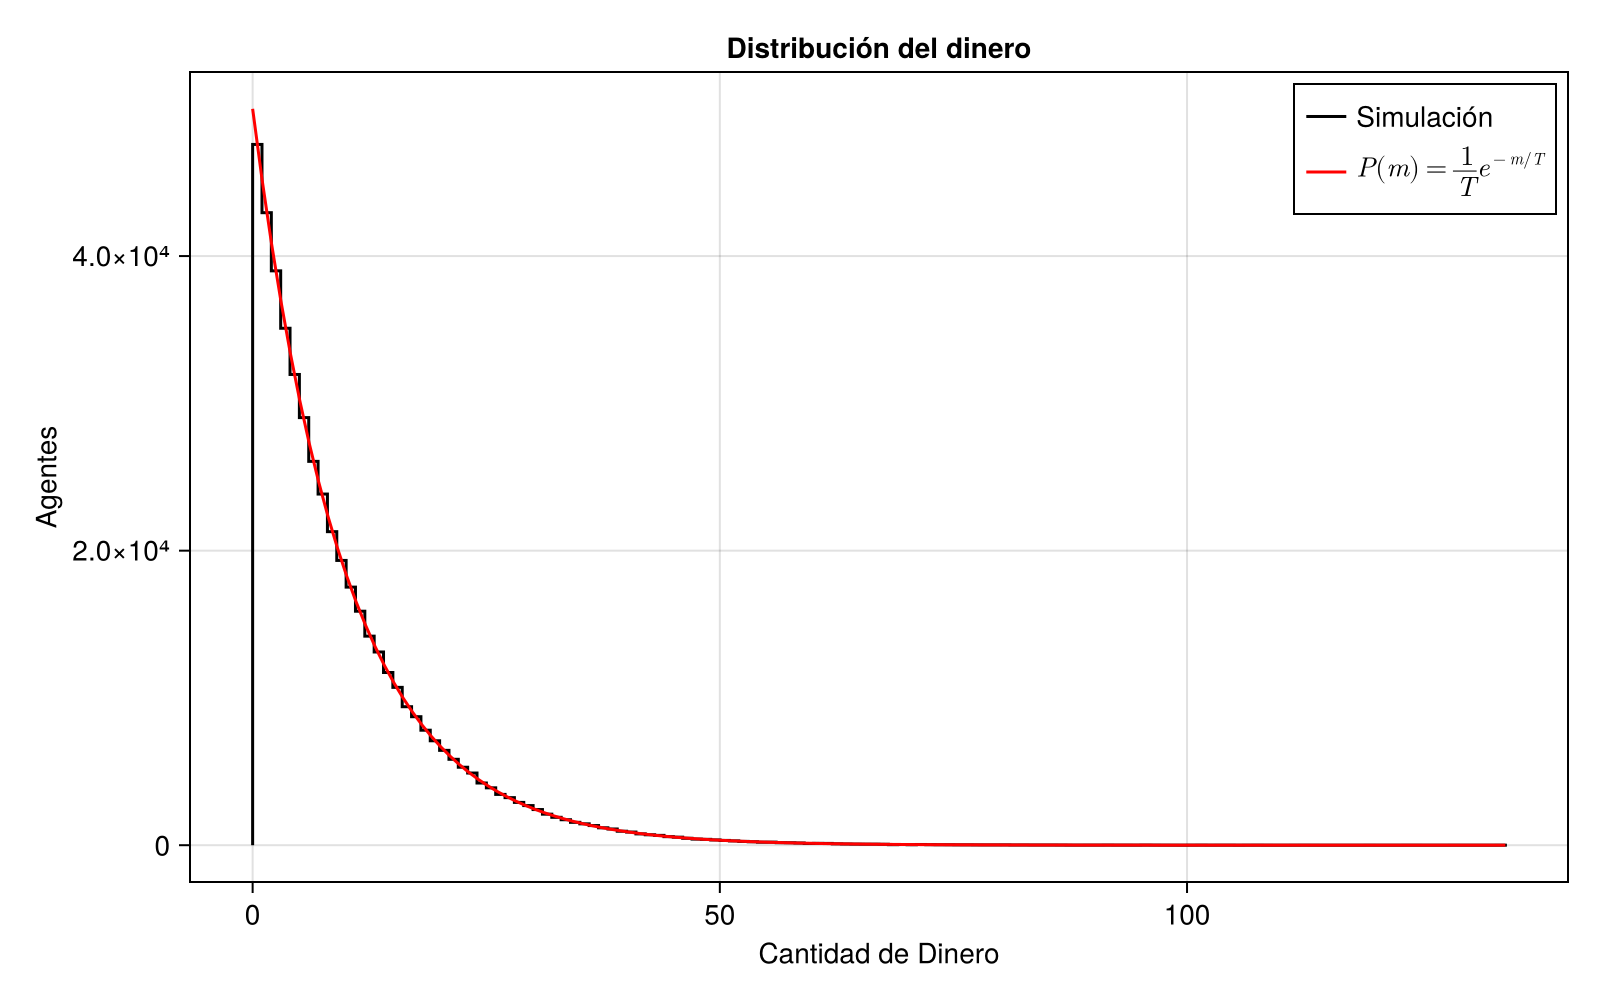

In [34]:
f = Figure(size = (800, 500))
ax = Axis(f[1, 1],
	title = "Distribución del dinero",
    xlabel = "Cantidad de Dinero",
    ylabel = "Agentes",
	)
stephist!(ax, sim, bins = max_val_sim_int, color = :black, label = "Simulación")
lines!(m_values, P_values, color=:red, label = L"P(m)=\frac{1}{T}e^{-m/T}")
axislegend(position=:rt)
f

En las simulaciones observamos que una distribución inicial estrecha, en la que todos los agentes tienen la misma cantidad de dinero, es inestable y evoluciona con el tiempo hacia una distribución amplia y sesgada, en la que muchos agentes tienen saldos monetarios bajos y pocos agentes tienen saldos monetarios altos. Finalmente, la distribución de dinero alcanza el equilibrio estadístico en la forma exponencial (la distribución de Boltzmann-Gibbs), de acuerdo con los principios generales de la física estadística y el principio de máxima entropía. 

Sin embargo, si una regla para transferencias de dinero no tiene simetría de inversión temporal , se pueden obtener otras distribuciones.

## Sistema económico cerrado con conservación de dinero 2.0: se rompe la simetría de inversión temporal

En este modelo de intercambio, la regla de transferencia es $\Delta m = \alpha m_i$, es decir, el intercambio es proporcional al saldo monetario del agente. 
Con esta regla se rompe la simetría de inversión temporal, por lo que el sistema puede tener una distribución estacionaria diferente a la de Boltzmann-Gibbs, o no tener ninguna distribución estacionaria.

Los parámetros para las simulaciones serán: $N = 5 \times 10^{5}$ y $M = 5 \times 10^{6}$. Por lo tanto, al principio de las simulaciones, los agentes contarán con la misma cantidad de dinero $\left\langle m \right\rangle = \frac{M}{N} = 10$.

Primero realizamos una simulación de intercambio aleatorio multiplicativo con $\alpha = 1/3$

In [130]:
# Initial conditions
N_exp = 5
M_exp = 6
T_exp = 7
million = 1_000_000
N = Int(5 * 10^N_exp)  # numero de agentes   
M = Int(5 * 10^M_exp) # Dinero total en el sistema 
T = Int(4 * 10^T_exp) # tiempo
M_prom = Int(M/N) # temperatura del dinero
α = 1/3

0.3333333333333333

In [131]:
Int(M_prom)

10

In [132]:
function sim_02(N, T, M_prom, α)
  Agentes = [Agent(M_prom) for i in 1:N]
  
  for t in 1:T
    agent_i = rand(1:N)
    agent_j = rand(1:N)

    coin_flit = rand(1:2)
    loser_index = [agent_i, agent_j][coin_flit]
    winner_index = [agent_i, agent_j][2-coin_flit+1]

    delta_m = α *  Agentes[loser_index].money

    if Agentes[loser_index].money >= delta_m
      Agentes[loser_index].money -= delta_m
      Agentes[winner_index].money += delta_m
    end
  end

  wealth = [0.0 for i in 1:N]
  for i in 1:N
    wealth[i] = Agentes[i].money
  end

return wealth
end

sim_02 (generic function with 2 methods)

In [133]:
sim = sim_02(N, T, M_prom, α)

500000-element Vector{Float64}:
 11.544920748104804
  1.4238354542859484
  3.2625101731374366
 13.228873499349808
  8.641661006473143
  3.0908857367551685
  7.271280040197968
 18.123208211803462
 15.176320861554727
 10.410676866264712
  ⋮
 16.6597342378591
  3.508372646109958
 11.724271091437615
 13.56201632386095
  7.694395561240804
  4.087309999316779
  2.9666004492475793
 15.340503023979112
  8.740274082775239

In [134]:
max_val_sim = maximum(sim)
max_val_sim_int = Int(floor(max_val_sim))
m_values = range(0, stop = max_val_sim, length=max_val_sim_int)
P_values = length(sim) * (1 / M_prom) * exp.(-m_values / M_prom)  

87-element Vector{Float64}:
 50000.0
 45171.8583905008
 40809.93580902915
 36869.21282581785
 33309.017214741594
 30092.604175021213
 27186.777087909024
 24561.544894182767
 22189.812556239034
 20047.101410043724
     ⋮
    18.155590974982967
    16.40243569035571
    14.818570045280893
    13.387646952702895
    12.0948978465903
    10.926980255475007
     9.871840094722309
     8.918587256249273
     8.057383211652347

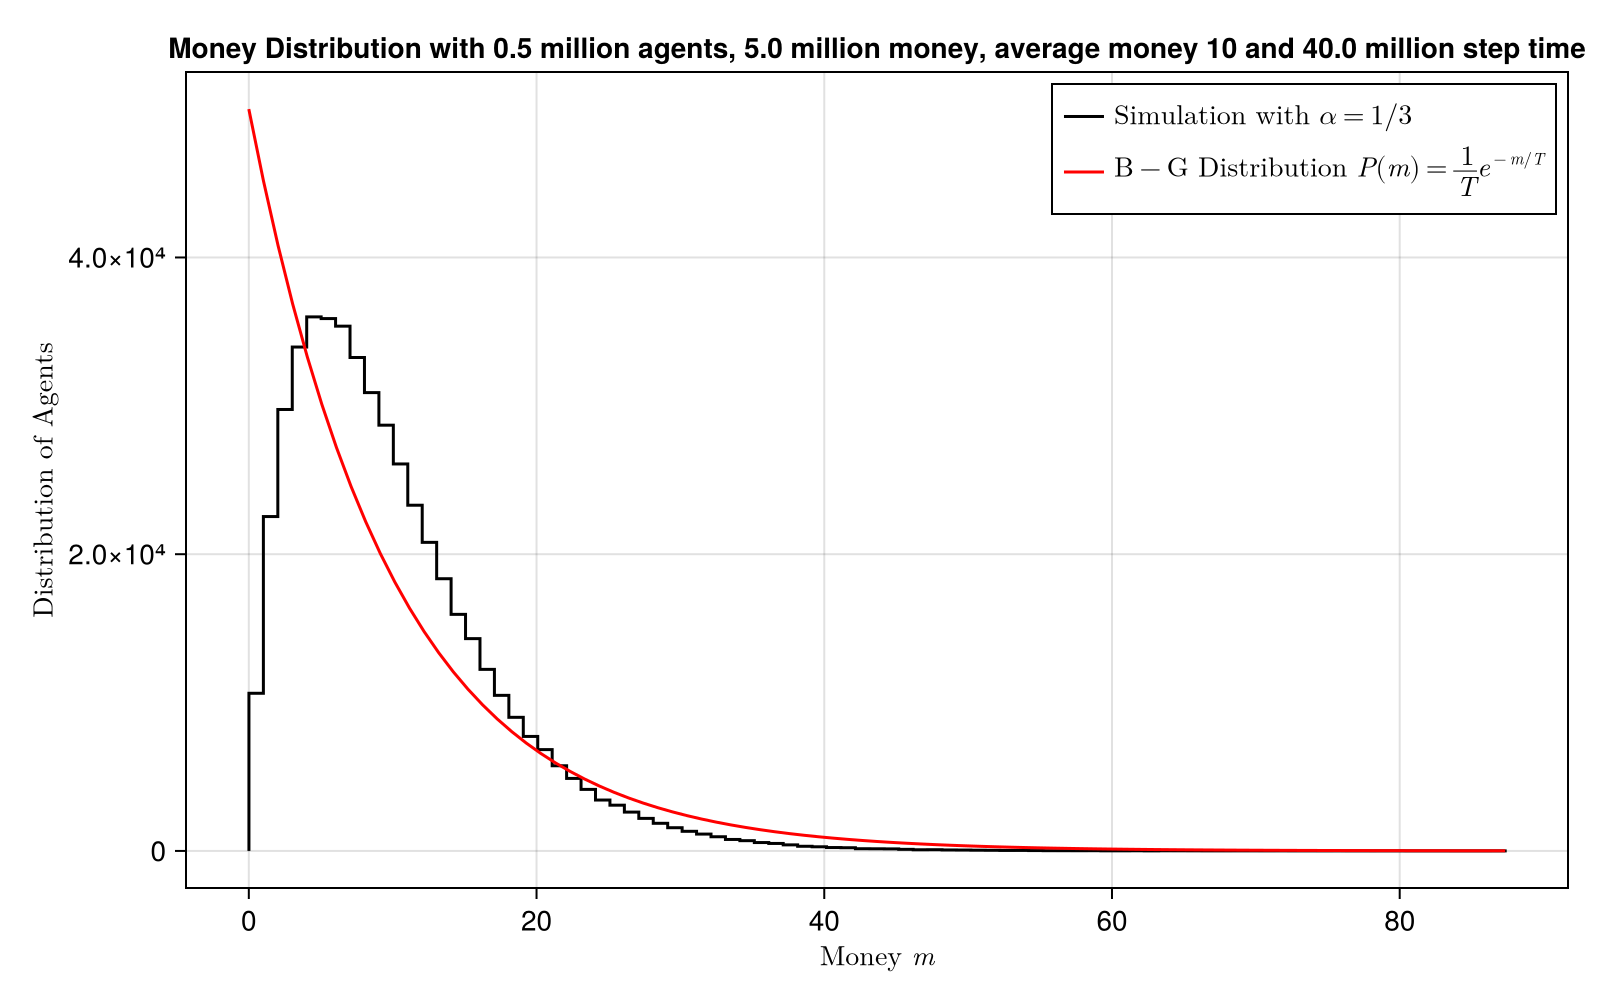

In [135]:
f = Figure(size = (800, 500))
ax = Axis(f[1, 1],
	title = "Money Distribution with $(N/million) million agents, $(M/million ) million money, average money $M_prom and $(T/million) million step time",
    xlabel = L"Money $m$",
    ylabel = L"\text{Distribution of Agents}",
	)
stephist!(ax, sim, bins = max_val_sim_int, color = :black, label = L"Simulation with $\alpha = 1/3$")
lines!(m_values, P_values, color=:red, label = L"B-G Distribution $P(m)=\frac{1}{T}e^{-m/T}$")
axislegend(position=:rt)
f

Podemos observar que la distribución estacionaria tiene una forma diferente a la distribución B-G: todavía tiene un extremo exponencial en el extremo superior, pero cae a cero en el extremo inferior. 

Esto último se cumple para simulaciones con $\alpha < 1/2$. 

Por otra parte, si realizamos una simulación de intercambio aleatorio multiplicativo con $\alpha = 1/2$, tenemos que

In [138]:
α=1/2
sim = sim_02(N, T, M_prom, α)

500000-element Vector{Float64}:
  1.9219608602842535
  3.876616635001383
  2.0206771647574535
 12.169280088339882
  0.4526508890912346
 13.460253471090198
 14.71605671065151
 10.686197138931343
  0.8122342283592614
  4.162880573710167
  ⋮
  5.248830387262561
  0.7018120660220106
 15.594848496709796
  0.628355875194504
  6.629952850861651
 20.042800897584108
  2.4992766027490068
 23.332585569331382
  0.04607836808240311

In [139]:
max_val_sim = maximum(sim)
max_val_sim_int = Int(floor(max_val_sim))
m_values = range(0, stop = max_val_sim, length=max_val_sim_int)
P_values = length(sim) * (1 / M_prom) * exp.(-m_values / M_prom) 

116-element Vector{Float64}:
 50000.0
 45198.78482222363
 40858.60298811346
 36935.18409192807
 33388.50876280548
 30182.400462099456
 27284.156478092325
 24664.214354183474
 22295.850348078762
 20154.906846226233
     ⋮
     1.01798819211402
     0.9202365849385207
     0.8318715077634823
     0.7519916255828061
     0.6797821534566282
     0.6145065456014788
     0.5554989825297839
     0.5021575796065574
     0.4539382477497083

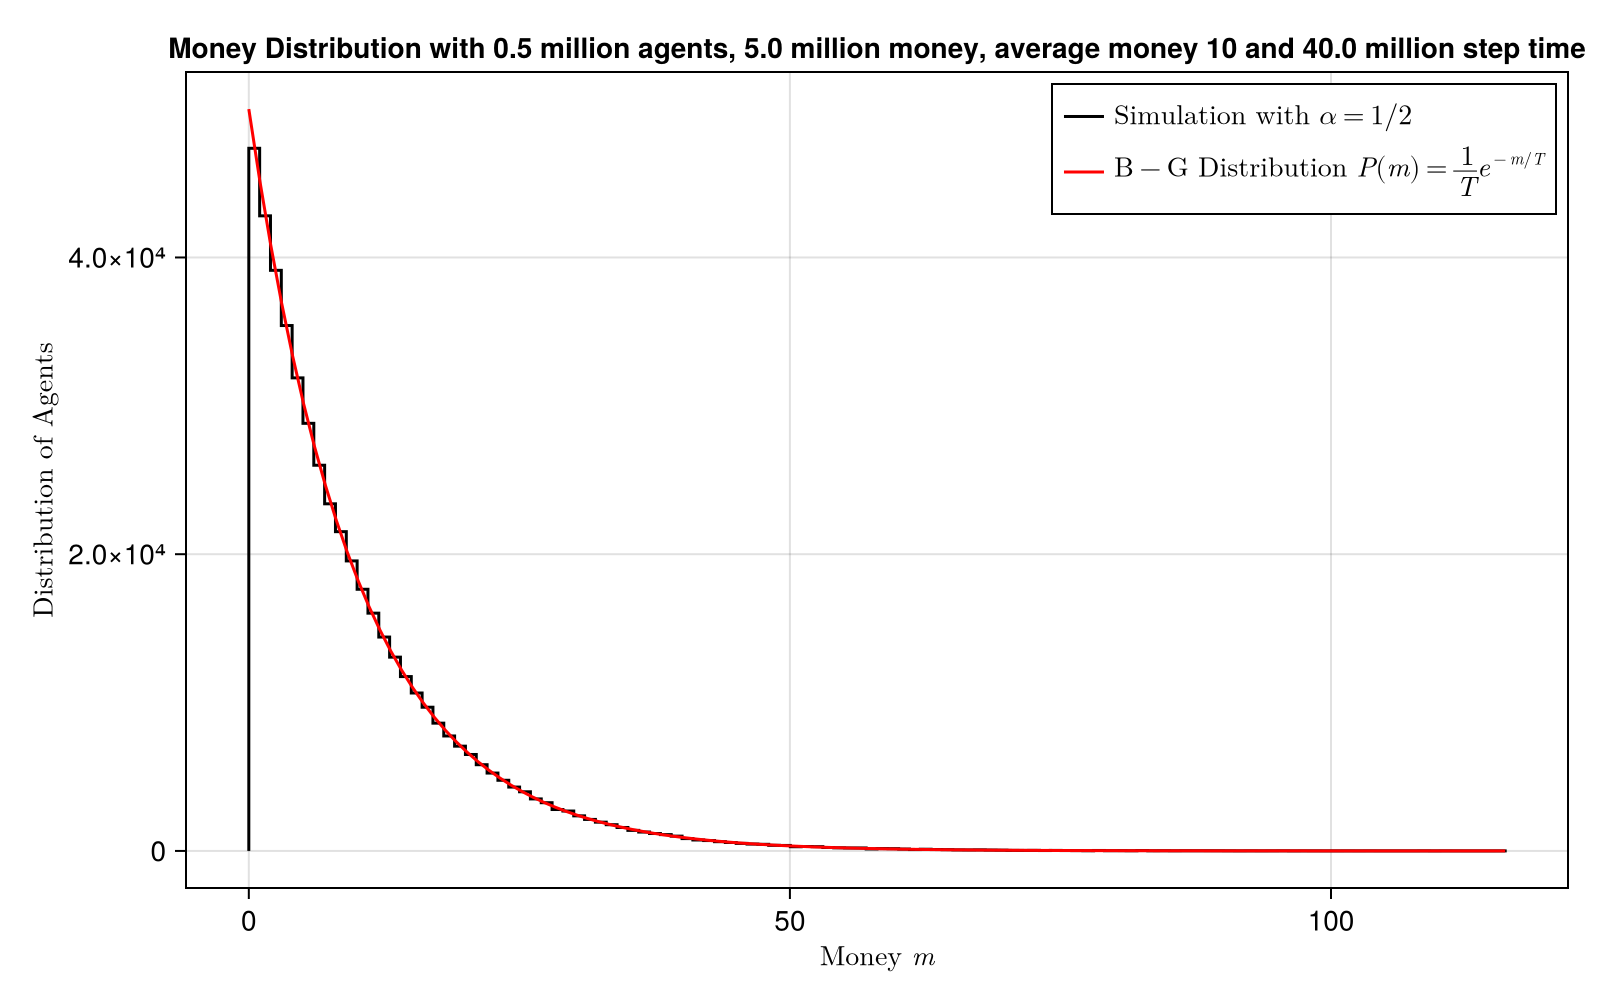

In [142]:
f = Figure(size = (800, 500))
ax = Axis(f[1, 1],
	title = "Money Distribution with $(N/million) million agents, $(M/million ) million money, average money $M_prom and $(T/million) million step time",
    xlabel = L"Money $m$",
    ylabel = L"\text{Distribution of Agents}",
	)
stephist!(ax, sim, bins = max_val_sim_int, color = :black, label = L"Simulation with $\alpha = 1/2$")
lines!(m_values, P_values, color=:red, label = L"B-G Distribution $P(m)=\frac{1}{T}e^{-m/T}$")
axislegend(position=:rt)
f

### Modelo de intercambio aleatorio con ahorro: Simulaciones

Otro ejemplo de tipo similar al anterior es uno donde los agentes guardan una fracción $\lambda$ de su dinero e intercambian una fracción aleatoria $\epsilon$ de su dinero total restante,

$$
m_i \longrightarrow m'_i = \lambda m_{i} + \epsilon \left( 1-\lambda \right)\left( m_i + m_j \right) \\
m_j \longrightarrow m'_j = \lambda m_{j} + \left( 1-\epsilon \right) \left( 1-\lambda \right)\left( m_i + m_j \right)
$$

de donde se deduce que la regla de intercambio es

$$
\Delta m = m_i - m'_i = \left( 1-\lambda \right)\left[ m_i - \epsilon \left( m_i+m_j \right) \right]
$$

En esta regla de intercambio se rompe la simetría de inversión temporal, por lo que la distribución estacionaria puede ser diferente a la distribución B-G.

Los parámetros para una simulación serán: $\lambda = 1/4$, $N = 5 \times 10^{5}$ y $M = 5 \times 10^{6}$. 

Por lo tanto, al principio de las simulaciones, los agentes contarán con la misma cantidad de dinero $\left\langle m \right\rangle = \frac{M}{N} = 10$.

In [242]:
# Initial conditions
N_exp = 5
M_exp = 6
T_exp = 7
million = 1_000_000
N = Int(5 * 10^N_exp)  # numero de agentes   
M = Int(5 * 10^M_exp) # Dinero total en el sistema 
T = Int(4 * 10^T_exp) # tiempo
M_prom = Int(M/N) # temperatura del dinero
λ = 1/4

0.25

In [243]:
function sim_03(N, T, M_prom, λ)
  Agentes = [Agent(M_prom) for i in 1:N]
  
  for t in 1:T
    ϵ = rand(Uniform(0.0, 1.0))
    agent_i = rand(1:N)
    agent_j = rand(1:N)

    coin_flit = rand(1:2)
    loser_index = [agent_i, agent_j][coin_flit]
    winner_index = [agent_i, agent_j][2-coin_flit+1]

    delta_m = (1 - λ) *  ( Agentes[loser_index].money - ϵ * (Agentes[loser_index].money + Agentes[winner_index].money))

    if Agentes[loser_index].money >= delta_m
      Agentes[loser_index].money -= delta_m
      Agentes[winner_index].money += delta_m
    end
  end

  wealth = [0.0 for i in 1:N]
  for i in 1:N
    wealth[i] = Agentes[i].money
  end

return wealth
end

sim_03 (generic function with 1 method)

In [244]:
sim = sim_03(N, T, M_prom, λ)

500000-element Vector{Float64}:
  4.934035482181144
 15.27227265917519
  7.2113746497765465
 11.806187523540522
  4.253660668037227
 22.052208381423217
 10.61372657476246
 12.974729052358718
  4.485176804608775
 18.649440358531166
  ⋮
  6.168235460815122
 14.213466079672134
 11.443795487068211
  8.786506814269808
  6.135132712510195
 14.205425034188854
  2.197353245845097
  6.654538225143244
 10.277738866550006

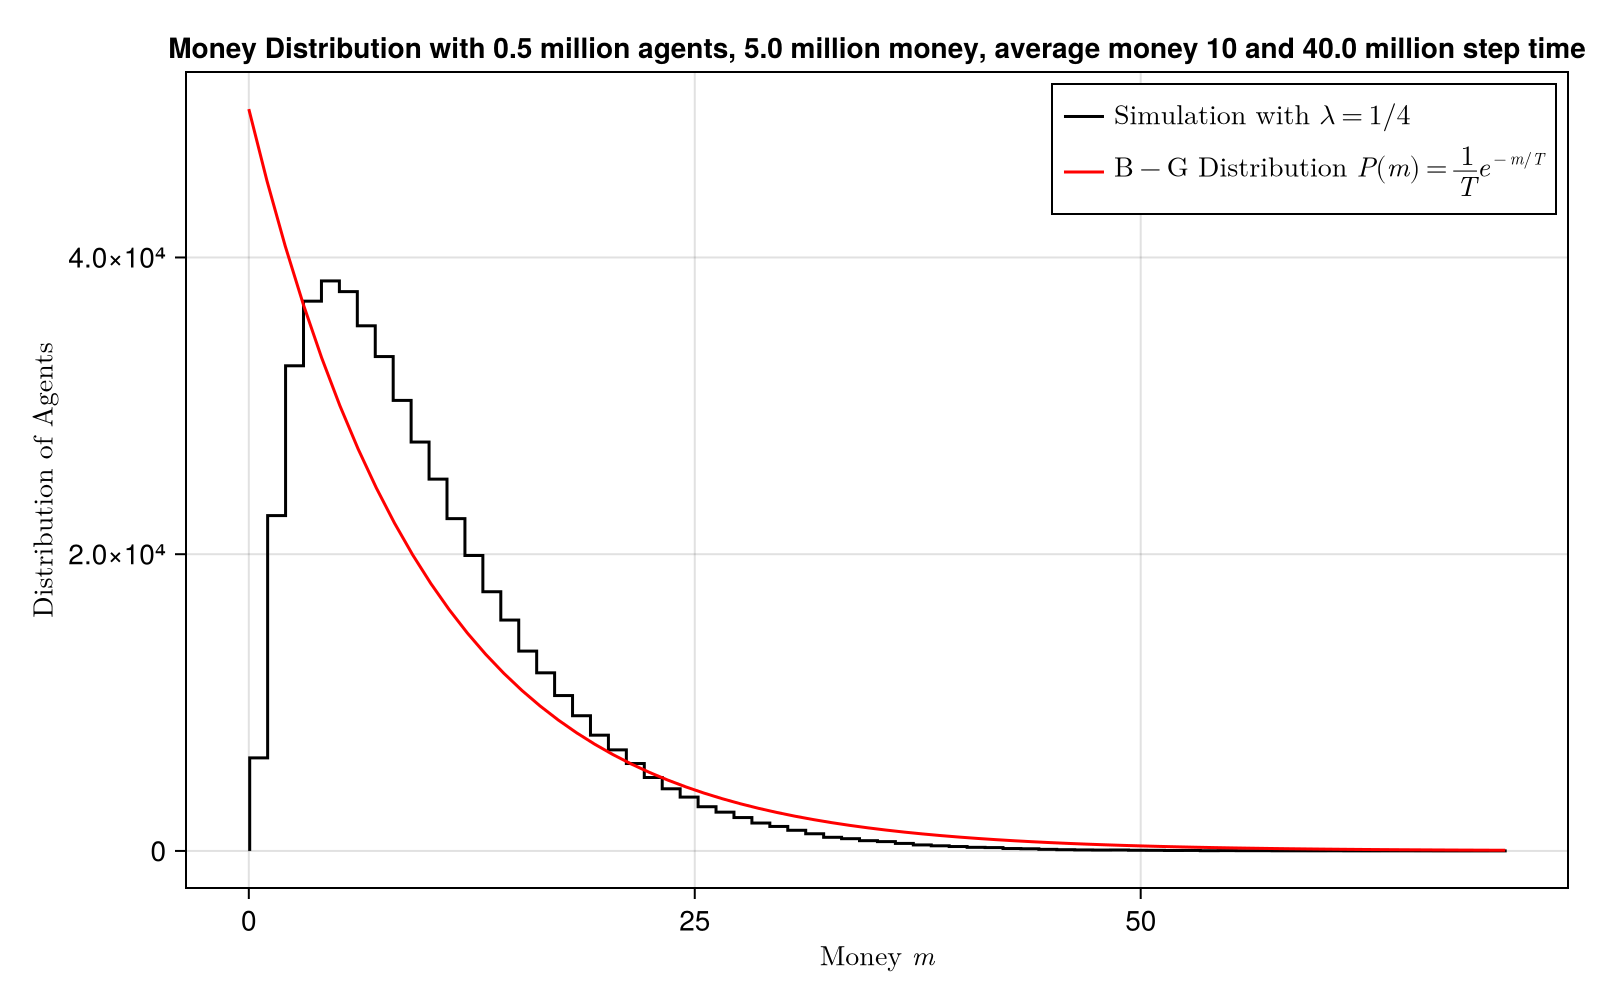

In [245]:
# parameters B-G distribution
max_val_sim = maximum(sim)
max_val_sim_int = Int(floor(max_val_sim))
m_values = range(0, stop = max_val_sim, length=max_val_sim_int)
P_values = length(sim) * (1 / M_prom) * exp.(-m_values / M_prom) 

# Graph
f = Figure(size = (800, 500))
ax = Axis(f[1, 1],
	title = "Money Distribution with $(N/million) million agents, $(M/million ) million money, average money $M_prom and $(T/million) million step time",
    xlabel = L"Money $m$",
    ylabel = L"\text{Distribution of Agents}",
	)
stephist!(ax, sim, bins = max_val_sim_int, color = :black, label = L"Simulation with $\lambda = 1/4$")
lines!(m_values, P_values, color=:red, label = L"B-G Distribution $P(m)=\frac{1}{T}e^{-m/T}$")
axislegend(position=:rt)
f

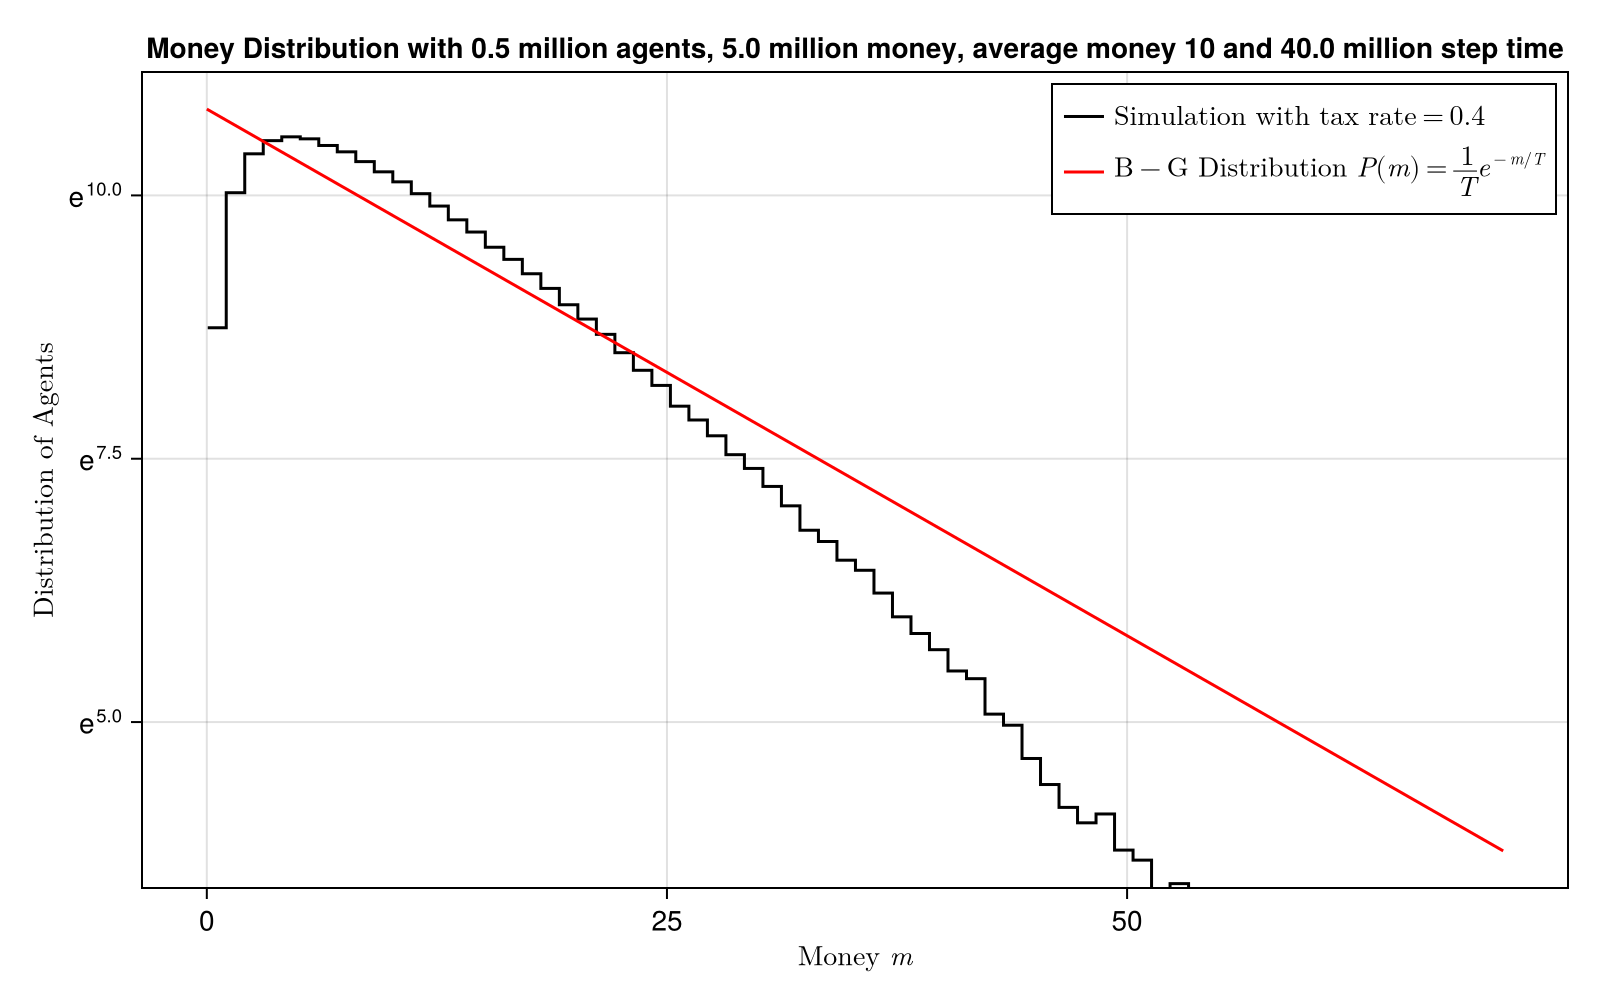

In [246]:
f = Figure(size = (800, 500))
ax = Axis(f[1, 1],
	title = "Money Distribution with $(N/million) million agents, $(M/million ) million money, average money $M_prom and $(T/million) million step time",
    xlabel = L"Money $m$",
    ylabel = L"\text{Distribution of Agents}",
    yscale = log
	)
stephist!(ax, sim, bins = max_val_sim_int, color = :black, label = L"Simulation with $\text{tax rate} = 0.4$")
lines!(m_values, P_values, color=:red, label = L"B-G Distribution $P(m)=\frac{1}{T}e^{-m/T}$")
axislegend(position=:rt)
f

Se puede observar que la forma de la distribución estacionaria tiene una forma cualitativamente similar a la que tiene la distribución estacionaria del modelo de intercambio multiplicativo.

### Modelo de intercambio aleatorio con impuestos y subsidios.

Otro ejemplo interesante cuya distribución no es de B-G ocurre en un modelo con impuestos y subsidios. 

Supongamos que hay un agente especial ("gobierno"), el cual recolecta una fracción $f$ ("impuesto") de toda transacción en el sistema, de tal manera que cada agente recibe un subsidio $\delta m$ con una frecuencia $1 / \tau_s$.

A continuación se muestran los resultados de una simulación. 

Los parámetros son: $f = 0.40$, $\tau_s = 4000$, $N = 5 \times 10^{4}$ y $M = 5 \times 10^{5}$. 

Por lo tanto, al principio de las simulaciones, los agentes cuentan con la misma cantidad de dinero $\left\langle m \right\rangle = \frac{M}{N} = 10$.

In [247]:
# Initial conditions
N_exp = 4
M_exp = 5
T_exp = 6
million = 1_000_000
N = Int(5 * 10^N_exp)  # numero de agentes   
M = Int(5 * 10^M_exp) # Dinero total en el sistema 
T = Int(4 * 10^T_exp) # tiempo
M_prom = Int(M/N) # temperatura del dinero
tax_rate = 0.4 #f 
τₛ = 4000

4000

In [248]:
mutable struct State
  money::Float64
  tax_rate::Float64
end

In [249]:
function collect_taxes(gob::State, from_amount)
  gob.money += (gob.tax_rate * from_amount)
end

collect_taxes (generic function with 1 method)

In [250]:
function subsidize(gob::State, to_agents)
  dm = gob.money / length(to_agents)
  for i in length(to_agents)
    gob.money -= dm
    to_agents[i].money += dm
  end
end

subsidize (generic function with 1 method)

In [251]:
government = State(0.0, tax_rate)
government.tax_rate

0.4

In [252]:
function sim_04(N, M, M_prom, rule, T, tax_rate, τₛ)
	
  Agentes = [Agent(M_prom) for i in 1:N]
  government = State(0.0, tax_rate)

  exchange_rules = ["small_constant", "random_pair_average", "random_system_average"]
  transaction_type = exchange_rules[rule]
  system_avg = M_prom
  for t in 1:T
    agent_i = rand(1:N)
    agent_j = rand(1:N)

    coin_flit = rand(1:2)
    loser_index = [agent_i, agent_j][coin_flit]
    winner_index = [agent_i, agent_j][2-coin_flit+1]

    delta_m = 0.0
    
    if transaction_type == "small_constant"
    delta_m += 1.0
    elseif transaction_type == "random_pair_average"
    avg = (Agentes[loser_index].money + Agentes[winner_index].money) / 2
    delta_m += rand(Uniform()) * avg
    elseif transaction_type == "random_system_average"
    delta_m += rand(Uniform()) * system_avg
    elseif transaction_type == "proportional"
    delta_m += 0.5 * lista.money
    end
    delta_m

    if Agentes[loser_index].money >= delta_m
      Agentes[loser_index].money -= delta_m
      government.money += (government.tax_rate * delta_m)
      delta_m *= (1- government.tax_rate)
      Agentes[winner_index].money += delta_m
    end

    if t % τₛ == 0
      dm = government.money / N
      for i in 1:N
      government.money -= dm
      Agentes[i].money += dm 
      end
    end
  end

  wealth = [0.0 for i in 1:N]
  for i in 1:N
    wealth[i] = Agentes[i].money
  end

return wealth
end

sim_04 (generic function with 2 methods)

In [253]:
sim = sim_04(N, M, M_prom, 3, T, tax_rate, τₛ)

50000-element Vector{Float64}:
  6.427848559170755
 13.76724658220284
 10.552464527174727
  5.935391541901572
  3.869584319632114
  5.139039991801398
 15.413124510513791
  6.386328770677995
 11.595432115994637
  3.9902617951882546
  ⋮
 23.666351353488736
 14.899296768203254
 19.62892863398996
  6.238870284478266
 32.38539647085936
  7.351434082190299
 12.744669253943504
 10.471419282454926
  3.31731443834147

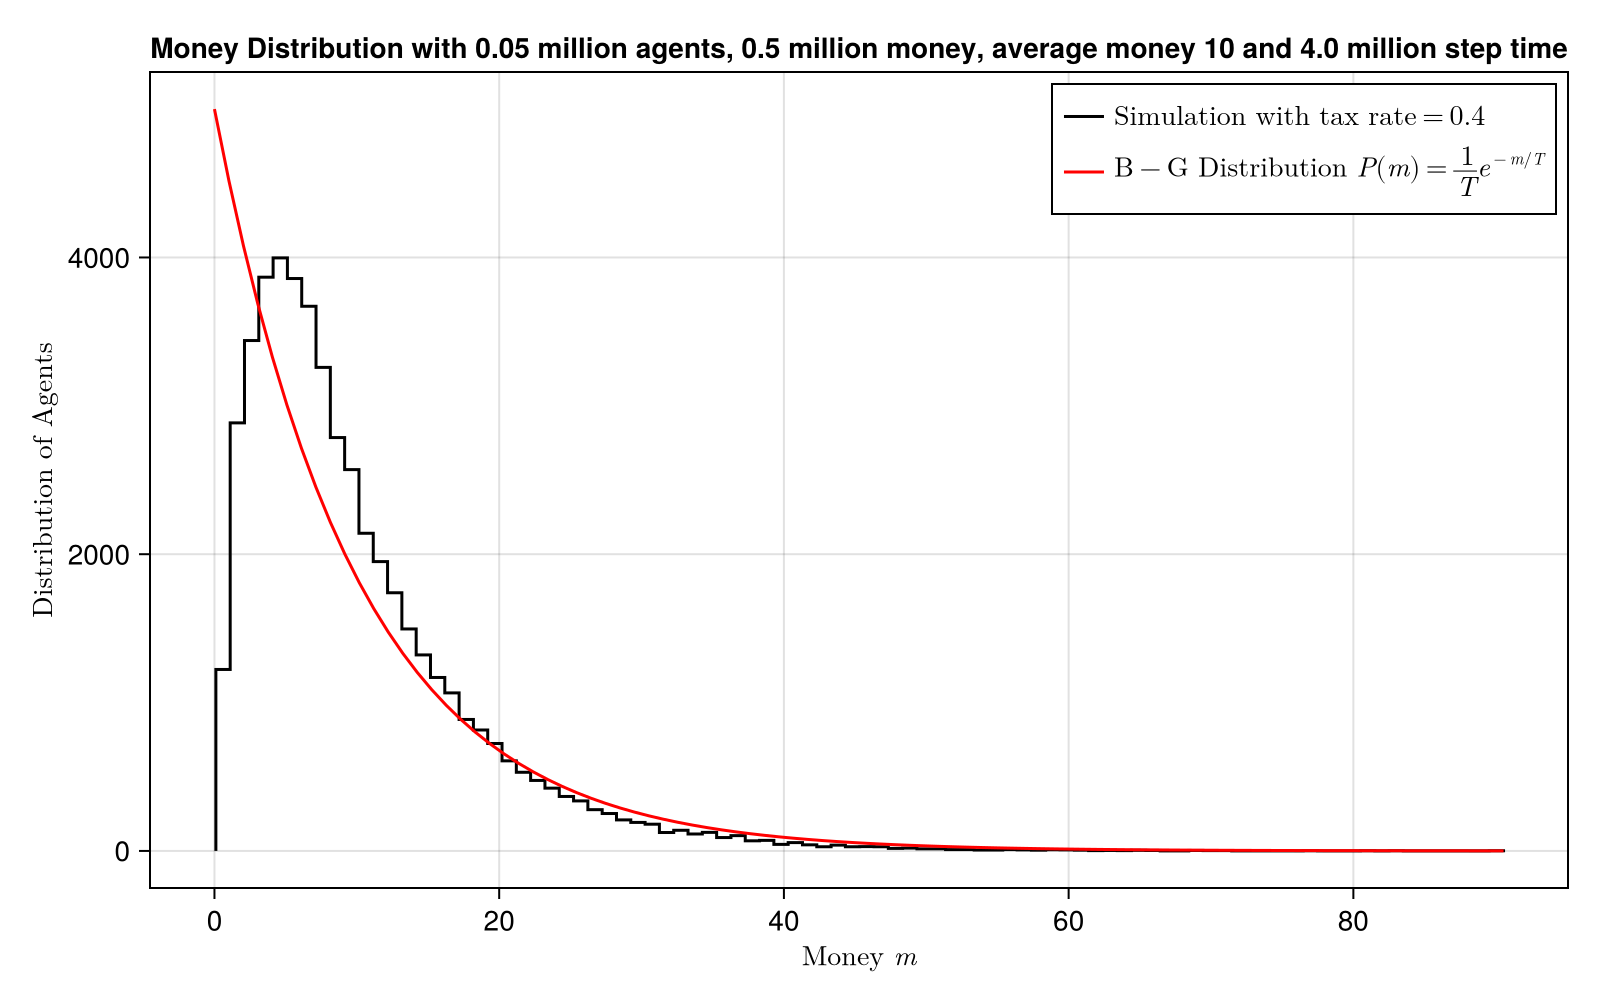

In [254]:
# parameters B-G distribution
max_val_sim = maximum(sim)
max_val_sim_int = Int(floor(max_val_sim))
m_values = range(0, stop = max_val_sim, length=max_val_sim_int)
P_values = length(sim) * (1 / M_prom) * exp.(-m_values / M_prom) 

# Graph
f = Figure(size = (800, 500))
ax = Axis(f[1, 1],
	title = "Money Distribution with $(N/million) million agents, $(M/million ) million money, average money $M_prom and $(T/million) million step time",
    xlabel = L"Money $m$",
    ylabel = L"\text{Distribution of Agents}",
    #yscale = log
	)
stephist!(ax, sim, bins = max_val_sim_int, color = :black, label = L"Simulation with $\text{tax rate} = 0.4$")
lines!(m_values, P_values, color=:red, label = L"B-G Distribution $P(m)=\frac{1}{T}e^{-m/T}$")
axislegend(position=:rt)
f

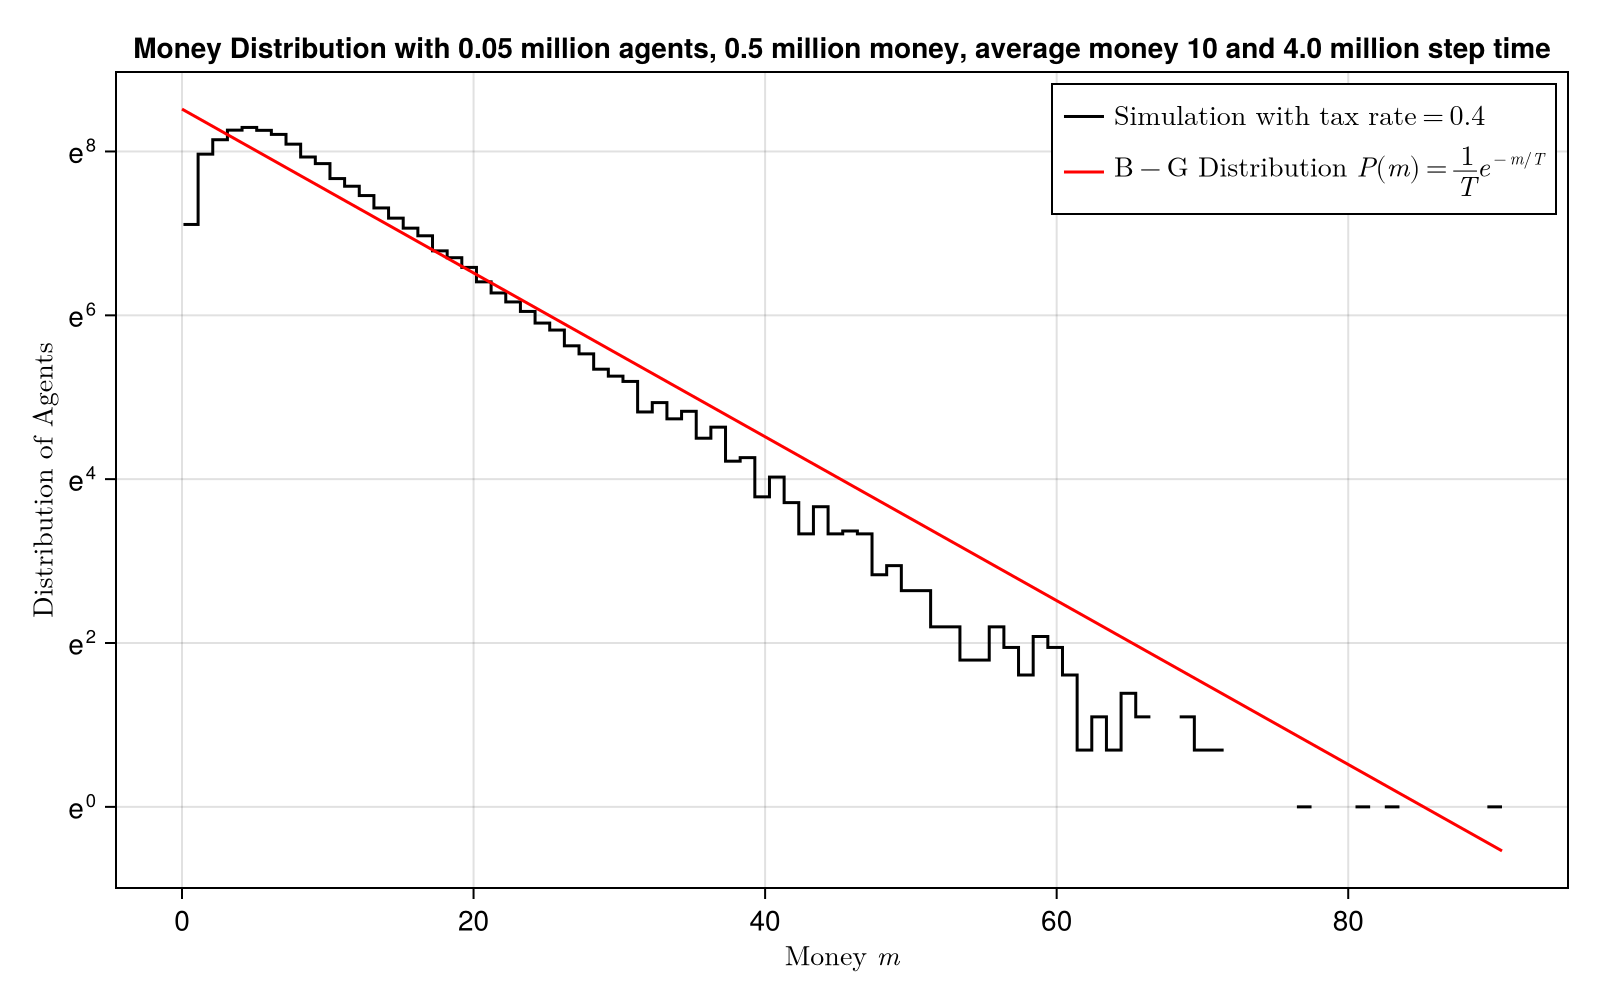

In [255]:
f = Figure(size = (800, 500))
ax = Axis(f[1, 1],
	title = "Money Distribution with $(N/million) million agents, $(M/million ) million money, average money $M_prom and $(T/million) million step time",
    xlabel = L"Money $m$",
    ylabel = L"\text{Distribution of Agents}",
    yscale = log
	)
stephist!(ax, sim, bins = max_val_sim_int, color = :black, label = L"Simulation with $\text{tax rate} = 0.4$")
lines!(m_values, P_values, color=:red, label = L"B-G Distribution $P(m)=\frac{1}{T}e^{-m/T}$")
axislegend(position=:rt)
f

Se puede observar que la distribución estacionaria es una distribución B-G desplazada. La población con bajos niveles económicos se ve disminuida porque el gobierno, actuando como una fuerza externa, “expulsa” a esa población y empuja al sistema fuera del equilibrio termodinámico. 

Estos ejemplos muestran que la distribución de Boltzmann-Gibbs no es completamente universal, es decir, no se cumple para cualquier modelo de intercambio que conserve dinero. Sin embargo, es universal en un sentido limitado: para una amplia clase de modelos que tienen simetría de inversión temporal, la distribución estacionaria es exponencial y no depende de los detalles de un modelo. 

Por el contrario, cuando se rompe la simetría de inversión temporal, la distribución puede depender de los detalles del modelo. La diferencia entre estas dos clases de modelos puede ser bastante sutil.

A diferencia de lo que ocurre en la física, en economía no existe un requisito fundamental de que las interacciones tengan simetría de inversión temporal. Sin embargo, en ausencia de un conocimiento detallado de la dinámica microscópica real del intercambio económico, la distribución semiuniversal de Boltzmann-Gibbs parece ser un punto de partida natural.

## Modelos con deuda

Ahora analicemos qué sucede si se permite a los agentes endeudarse. La deuda puede considerarse como dinero negativo. Ahora bien, cuando un perdedor no tiene suficiente dinero para pagar, puede pedir prestada la cantidad necesaria a un depósito o "reservorio", y su saldo se vuelve negativo. No se viola la ley de conservación: la suma del dinero positivo del ganador y el dinero negativo del perdedor permanece constante. Cuando un agente con un saldo negativo recibe dinero como ganador, utiliza este dinero para pagar la deuda hasta que su saldo se vuelve positivo. 

Suponemos, para simplificar, que el "reservorio" no cobra intereses por el dinero prestado. Sin embargo, como no es sensato permitir una deuda ilimitada, ponemos un límite $m_d$ a la deuda máxima de un agente: $m_{i} > -m_{d}$. Esta nueva condición a la frontera $P\left( m < -m_{d} \right) = 0$ reemplaza a la vieja condición $P\left( m < 0 \right) = 0$. De nuevo $P\left( m \right)$ está dada por la ley de Boltzmann-Gibbs, 

$$
P\left( m  \right) = \frac{1}{T}\exp \left[ -\left( m+m_d \right)/T \right]
$$ 

(así se cumple la condición de normalización $\int_{-m_d}^{\infty }P\left( m  \right) dm = 1$), pero ahora,

$$
\left\langle m \right\rangle = \int_{-m_d}^{\infty }m P\left( m  \right) dm = T-m_{d}
$$

por lo que ahora se tiene una temperatura de dinero $T = M/N + m_{d}$ más alta.

### Descripción del modelo

Los agentes económicos interaccionan a pares mediante transacciones monetarias. Solo se puede recibir o dar dinero en las transacciones.

Sean $i$ ("perdedor") y $j$ ("ganador") un par de agentes económicos que interaccionan. Sean $m$ y $m'$ la cantidad de dinero que posee un agente, antes y después de la transacción, la cual se da según

$$
m_i \longrightarrow m'_i = m_i - \Delta m \\
m_j \longrightarrow m'_j = m_j + \Delta m
$$

donde $\Delta m$ es el dinero que el "perdedor" transfirió al "ganador" después de la transacción.

Suposiciones y restricciones:

* El dinero se conserva, global y localmente, $m_i + m_j = m'_i + m'_j$
* El balance de los ganadores no puede ser menor a la deuda máxima, $m_i \ge -m_{d} \forall i$
* Una transacción se da solamente cuando el agente "perdedor" tiene el suficiente dinero para pagar, $m_{i} \ge \Delta m - m_{d}$

### Cómo se realizan las simulaciones

Los pasos para realizar una simulación son los siguientes:
* Inicialmente todos los agentes tienen la misma cantidad de dinero.
* Se elige un par ($i,j$) de agentes al azar, y se realiza la transacción, es decir, se transfiere la cantidad $\Delta m$.
* Se repite el paso anterior muchas veces.

En este trabajo se realizan simulaciones con cada una de las siguientes reglas de intercambio:
* Regla 1: Intercambio de una pequeña cantidad constante, $\Delta m = 1$.
* Regla 2: Intercambio de una fracción aleatoria $0 \le \nu \le 1$ del dinero promedio del par, $\Delta m = \nu \left[ \left( m_i + m_j \right)/2 + m_d \right] $
* Regla 3: Intercambio de una fracción aleatoria $0 \le \nu \le 1$ del dinero promedio del sistema,  $\Delta m = \nu M/N$

Nótese que el modelo anterior se generaliza al modelo con deuda si hacemos el cambio de variable $m \longrightarrow m + m_{d}$.

Los parámetros para las simulaciones son: $N = 5 \times 10^{4}$ y $M = 5 \times 10^{5}$. Por lo tanto, al principio de las simulaciones, los agentes contarán con la misma cantidad de dinero $\left\langle m \right\rangle = \frac{M}{N} = 10$.

Primero realicemos una simulación para deuda máxima $m_d = 8$. La temperatura de dinero del sistema de agentes sera, por lo tanto, $T = M/N + m_d = 18$.

In [171]:
# Initial conditions
N_exp = 4
M_exp = 5
T_exp = 5
million = 1_000_000
N = Int(5 * 10^N_exp)  # numero de agentes   
M = Int(5 * 10^M_exp) # Dinero total en el sistema 
T = Int(4 * 10^T_exp) # tiempo
M_avg = Int(M/N) # temperatura del dinero

m_d = 8 #deuda maxima

M_prom = M_avg + m_d # temperatura del dinero con deuda 


18

In [172]:
mutable struct Agent_debt
  money::Float64
  max_debt::Float64
end

In [173]:
Agent_debt(10, 8)

Agent_debt(10.0, 8.0)

In [174]:
function sim_05(N, M, M_avg, m_d, rule, T)
	
  Agentes = [Agent_debt(M_avg, m_d) for i in 1:N] # money = M_avg
  exchange_rules = ["small_constant", "random_pair_average", "random_system_average"]
  transaction_type = exchange_rules[rule]
  system_avg = M_avg

  for t in 1:T
    agent_i = rand(1:N)
    agent_j = rand(1:N)

    coin_flit = rand(1:2)
    loser_index = [agent_i, agent_j][coin_flit]
    winner_index = [agent_i, agent_j][2-coin_flit+1]

    delta_m = 0.0
    
    if transaction_type == "small_constant"
    delta_m += 1.0
    elseif transaction_type == "random_pair_average"
    avg = ( (Agentes[loser_index].money + Agentes[winner_index].money) / 2 ) + Agentes[loser_index].max_debt 
    delta_m += rand(Uniform()) * avg
    elseif transaction_type == "random_system_average"
    delta_m += rand(Uniform()) * system_avg
    elseif transaction_type == "proportional"
    delta_m += 0.5 * ( lista.money + Agentes[loser_index].max_debt )
    end
    delta_m

    if (Agentes[loser_index].money + Agentes[loser_index].max_debt) >= delta_m
      Agentes[loser_index].money -= delta_m
      Agentes[winner_index].money += delta_m
    end
  end

  wealth = [0.0 for i in 1:N]
  for i in 1:N
    wealth[i] = Agentes[i].money
  end

return wealth
end

sim_05 (generic function with 3 methods)

In [175]:
sim = sim_05(N, M, M_avg, m_d, 2, T)

50000-element Vector{Float64}:
  6.926159448085762
 13.994571736914592
 23.52076945189789
 18.826650712705167
  3.6121776190225336
 65.21506611560318
 -6.8601164888183135
 -5.197115199337818
 -4.756776575414566
  7.78625249551791
  ⋮
 30.80510492575209
  3.465035131908783
 15.634045003710153
 15.819340581438277
  1.312366215881843
  6.424751891463015
  3.005706907613792
  9.275374864057946
  5.811905445516608

In [176]:
minimum(sim)

-7.999347451392445

In [177]:
Int(floor(minimum(sim)))

-8

In [178]:
m_d

8

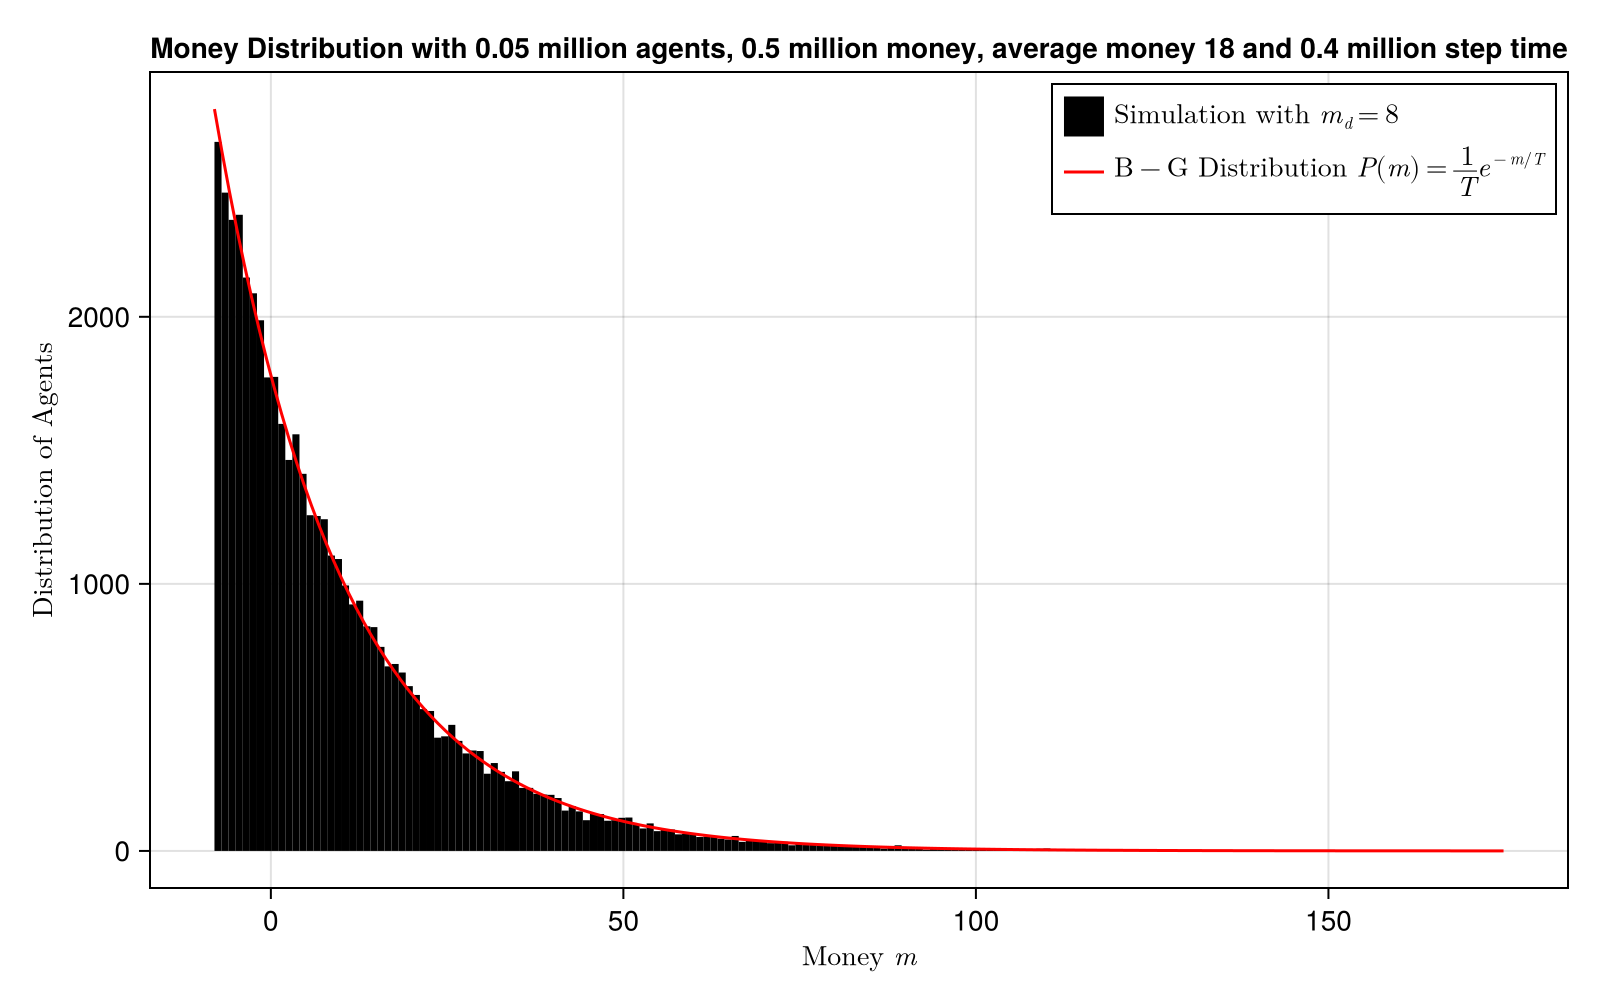

In [179]:
max_val_sim = maximum(sim) + m_d
max_val_sim_int = Int(floor(max_val_sim) )
m_values = range(-m_d, stop = max_val_sim, length=max_val_sim_int)
P_values = length(sim) * (1 / (M_prom)) * exp.(-(m_values .+ m_d)/ (M_prom)) 

# Graph
f = Figure(size = (800, 500))
ax = Axis(f[1, 1],
	title = "Money Distribution with $(N/million) million agents, $(M/million ) million money, average money $M_prom and $(T/million) million step time",
    xlabel = L"Money $m$",
    ylabel = L"\text{Distribution of Agents}",
    #yscale = log
	)
hist!(ax, sim, bins = max_val_sim_int, color = :black, label = L"Simulation with $m_d = 8$")
lines!(m_values, P_values, color=:red, label = L"B-G Distribution $P(m)=\frac{1}{T}e^{-m/T}$")
axislegend(position=:rt)
f

Luego realicemos una simulación sin deuda, $m_d = 0$, para comparar. La temperatura de dinero del sistema de agentes sera, por lo tanto, $T = M/N + m_d = 10$.

In [180]:
# Initial conditions
N_exp = 4
M_exp = 5
T_exp = 5
million = 1_000_000
N = Int(5 * 10^N_exp)  # numero de agentes   
M = Int(5 * 10^M_exp) # Dinero total en el sistema 
T = Int(4 * 10^T_exp) # tiempo
M_avg = Int(M/N) # temperatura del dinero

m_d = 0 #deuda maxima

M_prom = M_avg + m_d # temperatura del dinero con deuda 

10

In [181]:
sim_2 = sim_05(N, M, M_avg, m_d, 2, T)

50000-element Vector{Float64}:
 12.74683648713507
 31.550419510480715
  0.14165399459781014
 17.846484212455593
  3.4117990646403102
  6.789244404258035
  9.236803407806462
 14.853038166855546
  6.19178667849264
  0.5332218911012312
  ⋮
 16.685192999546253
  2.0383085172095514
  0.2622631533047204
  6.067978723403044
  7.9123401028790585
 12.795147198489914
 10.93329381575159
  7.122741442264904
  6.019112684472918

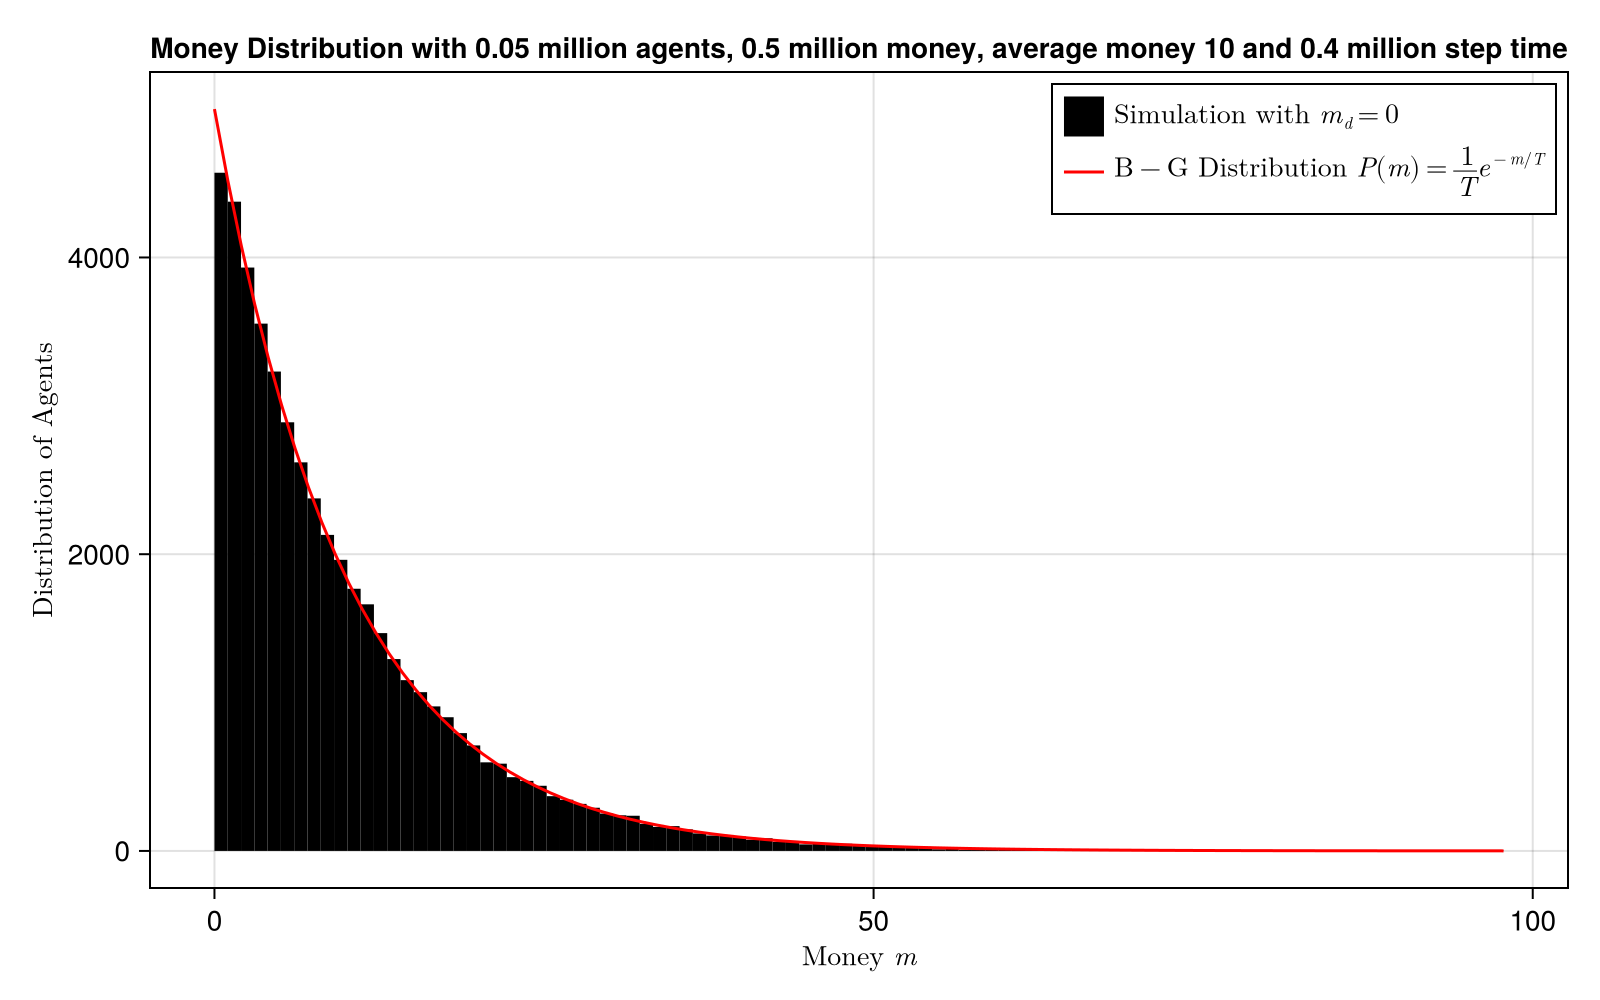

In [182]:
max_val_sim_2 = maximum(sim_2) + m_d
max_val_sim_int_2 = Int(floor(max_val_sim_2))
m_values_2 = range(-m_d, stop = max_val_sim_2, length=max_val_sim_int_2)
P_values_2 = length(sim) * (1 / (M_prom)) * exp.(-(m_values_2 .+ m_d)/ (M_prom)) 

# Graph
f = Figure(size = (800, 500))
ax = Axis(f[1, 1],
	title = "Money Distribution with $(N/million) million agents, $(M/million ) million money, average money $M_prom and $(T/million) million step time",
    xlabel = L"Money $m$",
    ylabel = L"\text{Distribution of Agents}",
    #yscale = log
	)
hist!(ax, sim_2, bins = max_val_sim_int_2, color = :black, label = L"Simulation with $m_d = 0$")
lines!(m_values_2, P_values_2, color=:red, label = L"B-G Distribution $P(m)=\frac{1}{T}e^{-m/T}$")
axislegend(position=:rt)
f

Por último, si comparamos las distribuciones B-G para ambos casos

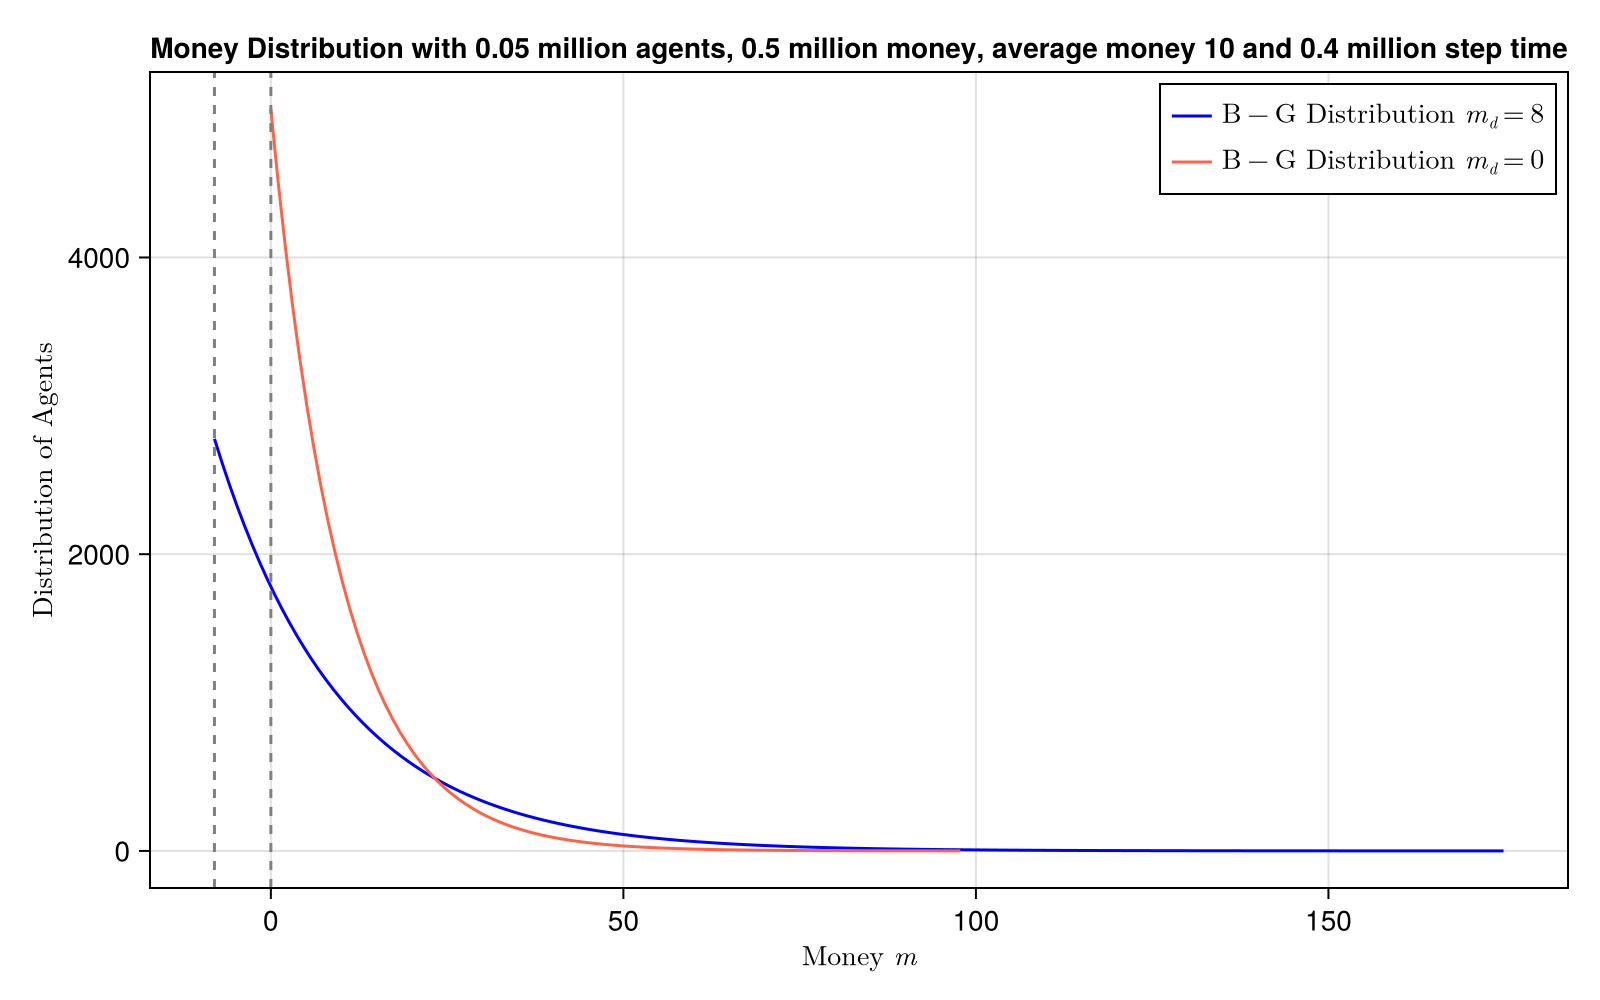

In [183]:
# Graph
f = Figure(size = (800, 500))
ax = Axis(f[1, 1],
	title = "Money Distribution with $(N/million) million agents, $(M/million ) million money, average money $M_prom and $(T/million) million step time",
    xlabel = L"Money $m$",
    ylabel = L"\text{Distribution of Agents}",
    #yscale = log
	)
lines!(m_values, P_values, color=:blue, label = L"B-G Distribution $m_d = 8$")
vlines!(-8, color=:gray, linestyle=:dash )
lines!(m_values_2, P_values_2, color=:tomato, label = L"B-G Distribution $m_d = 0$")
vlines!(0, color=:gray, linestyle=:dash )
axislegend(position=:rt)
f

Citando el artículo, 

> vemos que la temperatura más alta hace que la distribución del dinero sea más amplia, lo que significa que la deuda aumenta la desigualdad entre los agentes.

Para probar o refutar este enunciado, vamos a calcular el coeficiente Gini, es decir, el grado de desigualdad presente en la distribución de dinero B-G con deuda.

El coeficiente Gini de una distribución $P\left( m \right)$ se define en referencia a la curva de Lorentz, la cual se define como

$$
L\left( F\left( m \right) \right) = \frac{1}{\left\langle m \right\rangle}\int_{m_{min}}^{m}m'P\left( m' \right)dm'
$$

donde $F\left( m \right) = \int_{m_{min}}^{m}P\left( m' \right)dm'$ es la distribución acumulada de $P\left( m \right)$ y $\left\langle m \right\rangle = \int_{m_{min}}^{\infty} m' P\left( m' \right)dm'$ es la media de $P\left( m \right)$. Intuitivamente, esta integral representa la parte de algún activo que está en manos de la parte $100F$% inferior de la población. El coeficiente de Gini se obtiene entonces mediante el doble de la diferencia entre el área bajo la curva de Lorenz de una distribución perfectamente igualitaria (una línea recta con una pendiente de 1) y la curva de Lorenz de la distribución en cuestión,

$$
G = 1-2\int_{0}^{1}L\left( F \right)dF
$$

En el caso particular de la distribución B-G con deuda tenemos que $m_{min} = -m_{d}$, por lo que $F\left( m \right) = \int_{-m_{d}}^{m}\frac{1}{T}\exp \left[ -\left( m'+m_d \right)/T \right]dm' = 1 - \exp\left( -\frac{m+m_d}{T} \right) = 1 - \exp\left( -\frac{m+m_d}{\left\langle m \right\rangle+m_d} \right)$, y 

$$
L = \frac{1}{\left\langle m \right\rangle}\int_{-m_d}^{m}m'\frac{1}{T}\exp \left[ -\left( m'+m_{d} \right)/T \right]dm' = \frac{\left\langle m \right\rangle-\left( m + T \right)\exp \left[ -\left( m+m_{d} \right)/T \right]}{\left\langle m \right\rangle} \\
= \frac{\left\langle m \right\rangle-\left( m+T \right)\left( 1-F \right)}{\left\langle m \right\rangle} = \frac{\left\langle m \right\rangle- \left[ T \ln \frac{1}{1-F}-m_{d}+T \right] \left( 1-F \right)}{\left\langle m \right\rangle} \\
= \frac{\left\langle m \right\rangle - \left[ T \ln \frac{1}{1-F} + \left\langle m \right\rangle \right] \left( 1-F \right)}{\left\langle m \right\rangle} = 1 - \left( 1-F \right)\left( 1+ \frac{\left\langle m \right\rangle + m_d}{\left\langle m \right\rangle} \ln \frac{1}{1-F} \right)
$$

Grafiquemos la curvas de Lorentz correspondientes a las simulaciones,

# Modelo más realista 

### Descripción del modelo

Para que el modelo sea un poco más realista, introducimos empresas. Un agente a la vez se convierte en una empresa. La empresa toma prestado capital $K$ de otro agente y lo devuelve con un interés $rK$, contrata $L$ agentes y les paga un salario $W$, fabrica $q$ artículos de un producto y los vende a $q$ agentes a un precio $p$. Todos estos agentes son seleccionados aleatoriamente. La empresa recibe la ganancia
$$
\pi = pq - LW - rK
$$

El resultado neto es un intercambio de dinero entre muchos cuerpos que aún satisface la ley de conservación.

Los parámetros del modelo que maximizan la ganancia se obtienen de la siguiente forma:

1) Se establece la curva de oferta-demanda agregada, $p\left( q \right) = V/q^{\eta}$, donde $q$ es la cantidad de productos que la gente compraría a un precio $p$. $V = 100$ y $\eta = 1/2$ son constantes.
2) Se establece la función de producción de la firma, $Q\left( L,K \right) = L^{\beta}K^{1-\beta}$, con $\beta = 8/10$.
3) Se sustituyen las expresiones de los pasos anteriores en la ecuación de la ganacia, y se obtiene la ecuación $F\left( L,K \right) = V Q^{1-\eta} - LW - rK = V \left(L^{\beta}K^{1-\beta}\right)^{1-\eta} - LW - rK$
4) Se resuelve $\nabla F\left( L,K \right) = 0$ para maximizar la ganancia. La solución es 
$$
L_{critico} = \left( \frac{V \beta\left( 1-\eta \right)}{W} \right)^{1/\eta}\left( \frac{W \left( 1-\beta \right)}{r\beta} \right)^{\left(1-\beta\right)\left(1-\eta\right)/\eta}\\
K_{critico} = \frac{1-\beta}{\beta}\cdot\frac{W}{r}L_{critico}
$$

Una vez se establecen los valores de los parámetros $W$ y $r$, se pueden encontrar los valores de $L_{critico}$, $K_{critico}$, $Q_{c} = Q \left( L_{critico},K_{critico}  \right)$, $R_{c} = R \left( Q_c \right)$ y $F_{max}$, en ese orden. Por ejemplo, si $W = 10$ y $r=0.15$, entonces
$$
L_{critico} = \simeq 28\\
K_{critico} = 468.1\\
Q_{c} \simeq 49\\
R_{c} = 14.242\\
F_{max} = 351.075
$$

Es decir, con aquellos valores de salario y tasa de interés, la empresa obtendrá una ganancia máxima de 351.1$ si contrata a 28 trabajadores, toma prestado 468.1$ de capital, fabrica 49 artículos de su producto y los vende a 14.2$ cada uno.